# Quantum Fourier Transform

The Quantum Fourier Transform (QFT, also known as discrete Fourier transform) is a transformation described by an $N \times N$ matrix where the entries are the $N^{th}$ routs of unity:

$$ QFT_N = \frac{1}{\sqrt{N}} \begin{bmatrix} 
                                1 & 1 & 1 & 1 & \dots & 1 \\
                                1 & \omega & \omega^2 & \omega^3 & \dots & \omega^{(N-1)} \\
                                1 & \omega^2 & \omega^4 & \omega^6 & \dots & \omega^{2(N-1)} \\
                                \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                                1 & \omega^{(N-1)} & \omega^{2(N-1)} & \omega^{3(N-1)} & \dots & \omega^{(N-1)^2}
                                \end{bmatrix}$$
                                
where $\omega = e^{\frac{2i\pi}{N}}$. This means that each entry represent a multiple of this rotation $\omega$, and we will see that the corresponding quantum circuit will be composed of several rotations. Lastly, it is straightforward but important to notice that when $N=2$ the transformation is identically the H gate.

<br> 

To compute this transformation classically, we need order $O(N^2)$ time. We can even apply the Fast Fourier Transform classical circuit (FFT), wich allows us to compute it in nearly linear time, precisely in $O(N log(N))$ steps, and is the basis for digital signal processing in almost any device that can play music.

<br>

On a QPU we can execute this same operation in $O(log^2 N)$ time, a huge improvement. However, the results you get are accessible only probably: classically one can apply the matrix to a vector to compute a new vector; quantumly, we can only sample to get one state $|j>$ with probability $|\beta_j|^2$, where the $\beta_j$ correspond to the $j$-th entry on the vector we would obtain classically. In other words, the speedup is great, but we need to use the quantum circuit in a clever way: we will use it e.g. in Shor's algorithm.

## QFT on Qiskit

Let's now implement the circuit in Qiskit. To do it we just need to apply two kind of gates: the H gate and the controlled phase gate (CP):

$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 
                                1 & 1 \\
                                1 & -1\end{bmatrix} \space \space R_m(\theta) = \begin{bmatrix} 
                                1 & 0 & 0 & 0 \\
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 1 & 0 \\
                                0 & 0 & 0 & e^{i\theta} \end{bmatrix}$$
                                
where the angle is $\theta = \frac{2 \pi}{2^m}$, $m$ being the control qubit. The circuit will then be:

![QFT](QFT1.png)

Note that in Qiskit the qubit numbering is different.
<br>
Now le's implement the circuit for an $N$ qubit system, starting with $N=3$

In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from numpy import pi
import matplotlib as mpl

In [2]:
N = 3

In [3]:
circuit = QuantumCircuit(N)

for q1 in range(N):
    circuit.h(q1)
    
    for q2 in range(q1+1, N) :
        circuit.cp(pi/2**(q2 - q1), q1, q2)
    
    circuit.barrier()

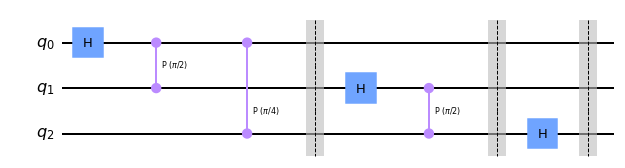

In [4]:
circuit.draw(output='mpl')

We can then easly embedd the process in a simple function to get the $QFT$ of order $N$:

In [5]:
def QFT(n): 
    circuit_ = QuantumCircuit(n)

    for q1 in range(n):
        circuit_.h(q1)

        for q2 in range(q1+1, n) :
            circuit_.cp(pi/2**(q2 - q1), q1, q2)

        circuit_.barrier()

    return circuit_

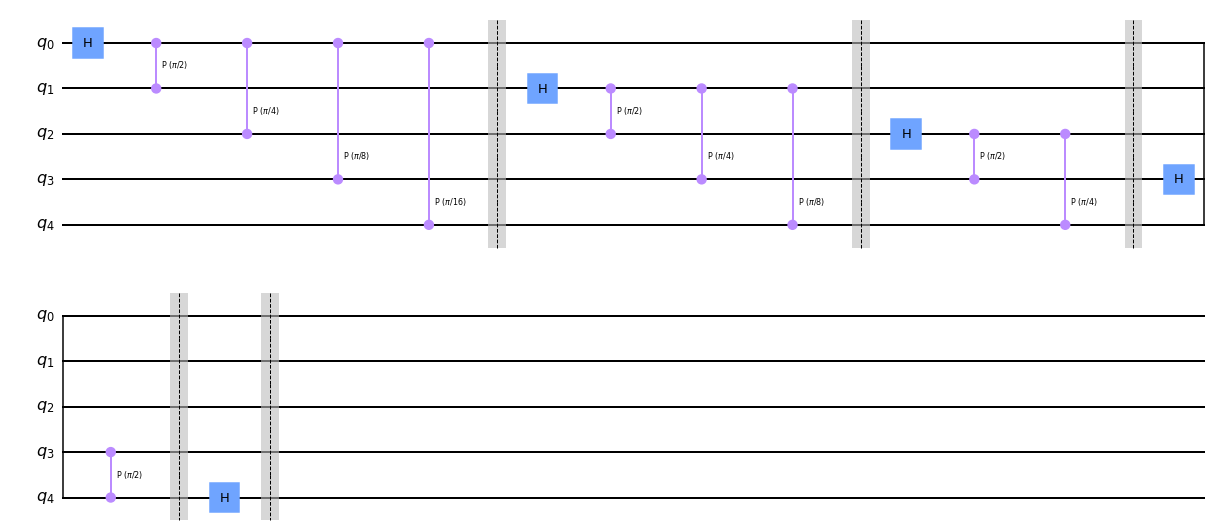

In [6]:
QFT(5).draw('mpl')

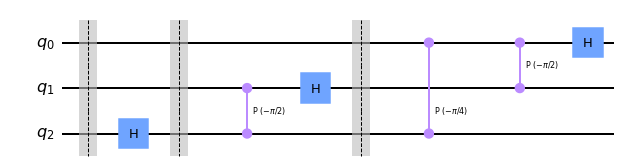

In [7]:
QFT(3).inverse().draw(output='mpl')

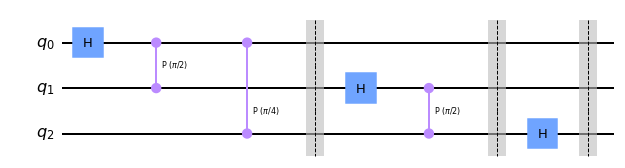

In [8]:
QFT(3).draw(output='mpl')

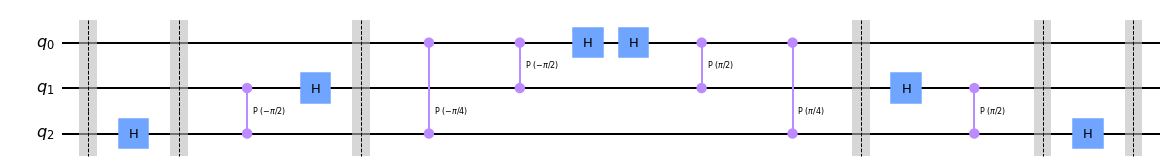

In [13]:
(QFT(3).inverse() + QFT(3)).draw(output='mpl')